# Prática de IA: Treinamento de modelo

## Netflix: Series and Movies

O objetivo nessa prática é apresentar o workflow básico pra criação de um modelo inteligente para solucionar um problema de classificação. Desta forma, vamos realizar, passo a passo, as quatro principais etapas do processo: Extração de atributos, Divisão dos dados, Treinamento do modelo e Avaliação do modelo.

In [1]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [83]:
# Carregar e entender os dados

# biblioteca para carregar e realizar operações tabulares
import pandas as pd

# biblioteca para plotar gráficos
import matplotlib.pyplot as plt 


# dataset, arquivo com os dados sobre a covid19 nas cisdades do BR
arquivo  = 'Netflix TV Shows and Movies.csv'

# carregando o conteúdo do arquivo em um objeto pandas.DataFrame
# a partir do método de carregamento de arquivo read_csv
# especificando que a primeira linha contém os nomes do cabeçalho
dataset = pd.read_csv(arquivo, sep=',')

dataset = dataset.drop(columns=['index'])
dataset = dataset.rename(columns={'imdb_votes': 'votes', 'imdb_score': 'score'})



# exibindo a dimensão dos dados carregados (linhas, colunas)
dataset.shape

(5283, 10)

In [84]:
# exibindo as 10 primeiras linhas de valores contidos no dataset
dataset.head(10)
# exibindo os 10 últimas linhas de valores do dataset
#dataset.tail(10)

,id,title,type,description,release_year,age_certification,runtime,imdb_id,score,votes
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0
5,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,tt0066999,7.7,153463.0
6,tm185072,My Fair Lady,MOVIE,A snobbish phonetics professor agrees to a wag...,1964,G,170,tt0058385,7.8,94121.0
7,tm98978,The Blue Lagoon,MOVIE,Two small children and a ship's cook survive a...,1980,R,104,tt0080453,5.8,69053.0
8,tm119281,Bonnie and Clyde,MOVIE,"In the 1930s, bored waitress Bonnie Parker fal...",1967,R,110,tt0061418,7.7,111189.0
9,tm67378,The Professionals,MOVIE,An arrogant Texas millionaire hires four adven...,1966,PG-13,117,tt0060862,7.3,16168.0


In [85]:
# para acesssar uma linha aleatória
dataset.iloc[23] #linha especifica
dataset.sample() #linha aleatoria

,id,title,type,description,release_year,age_certification,runtime,imdb_id,score,votes
3743,ts255418,Bad Boy Billionaires: India,SHOW,This investigative docuseries explores the gre...,2020,TV-14,0,tt12923630,7.9,3010.0


In [86]:
#verificando os tipos de dados de cada coluna
dataset.dtypes

id                    object
title                 object
type                  object
description           object
release_year           int64
age_certification     object
runtime                int64
imdb_id               object
score                float64
votes                float64
dtype: object

In [87]:
# 
dataset.groupby('title')['score'].head(5).sort_values(ascending=False)


622     9.6
2787    9.6
229     9.5
3144    9.3
3597    9.3
       ... 
4782    1.7
1101    1.7
3355    1.7
4648    1.6
1664    1.5
Name: score, Length: 5283, dtype: float64

In [88]:
# para obter um resumo estatístico dos dados
dataset.describe()

,release_year,runtime,score,votes
count,5283.000000,5283.000000,5283.000000,5.267000e+03
mean,2015.879992,79.199886,6.533447,2.340719e+04
std,7.346098,38.915974,1.160932,8.713432e+04
min,1953.000000,0.000000,1.500000,5.000000e+00
25%,2015.000000,45.000000,5.800000,5.210000e+02
50%,2018.000000,87.000000,6.600000,2.279000e+03
75%,2020.000000,106.000000,7.400000,1.014400e+04
max,2022.000000,235.000000,9.600000,2.268288e+06


In [89]:
dataset.shape

(5283, 10)

In [90]:
duplicate_rows_df = dataset[dataset.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 10)


In [91]:
dataset.count()

id                   5283
title                5283
type                 5283
description          5278
release_year         5283
age_certification    2998
runtime              5283
imdb_id              5283
score                5283
votes                5267
dtype: int64

In [92]:
print(dataset.isnull().sum())  # Verifica valores nulos em cada coluna

id                      0
title                   0
type                    0
description             5
release_year            0
age_certification    2285
runtime                 0
imdb_id                 0
score                   0
votes                  16
dtype: int64


In [111]:
df_cleaned = dataset.dropna() #remover linhas com valores nulos
print(df_cleaned.isnull().sum())  # Verifica valores nulos após a limpeza

id                   0
title                0
type                 0
description          0
release_year         0
age_certification    0
runtime              0
imdb_id              0
score                0
votes                0
dtype: int64


In [112]:
df_cleaned.count()

id                   2987
title                2987
type                 2987
description          2987
release_year         2987
age_certification    2987
runtime              2987
imdb_id              2987
score                2987
votes                2987
dtype: int64

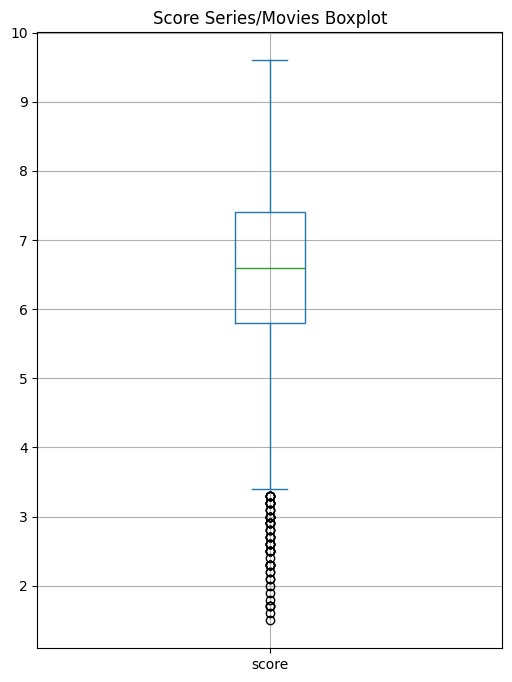

In [113]:
dataset['score'].plot.box(figsize=(6,8), grid=True, vert=True, title='Score Series/Movies Boxplot')

plt.show()

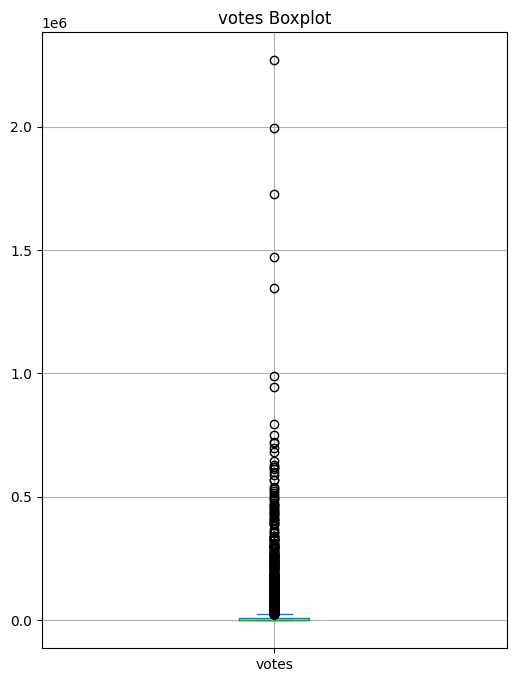

In [114]:
dataset['votes'].plot.box(figsize=(6,8), grid=True, vert=True, title='votes Boxplot')
plt.show()

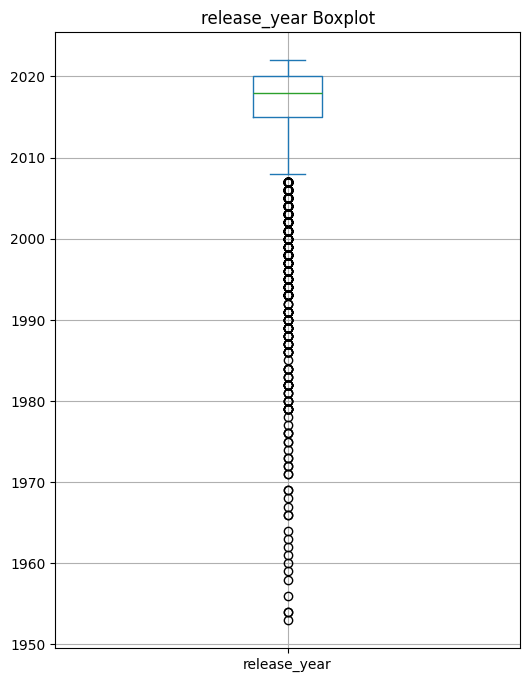

In [115]:
dataset['release_year'].plot.box(figsize=(6,8), grid=True, vert=True, title='release_year Boxplot')
plt.show()

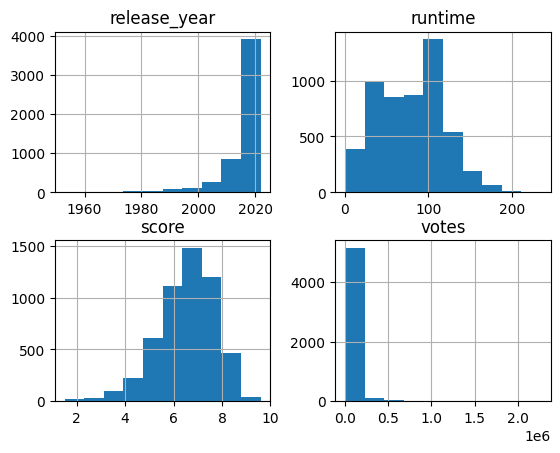

In [116]:
# exibindo um gráfico de histogramas para entender a distribuição dos mesmos
dataset.hist()
plt.show()

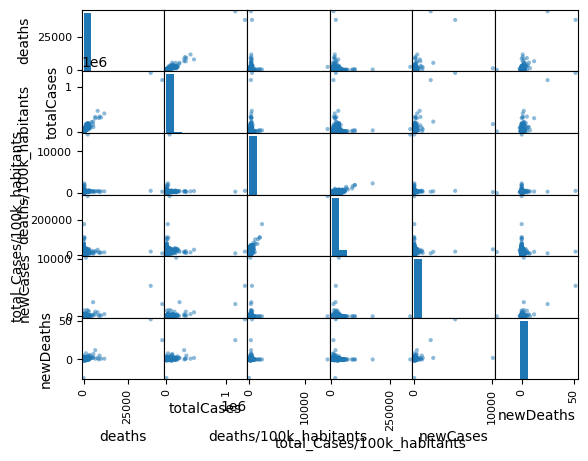

In [18]:
# gráfico tipo 'scatter plot' para verificar correlações entre as variáveis
pd.plotting.scatter_matrix(dataset)
plt.show()


# 2 - Divisão dos dados

Criando dois conjuntos de dados para serem utilizados nas etapas seguintes, treinamento e avaliação.

<div>
<br/>
<img src="https://github.com/rafaelmm82/ufpb-ia-20201/raw/master/02-fundamentos_de_ia/02_aula_pratica_classificacao_iris/03_divisao_dados.jpg", width="640"/>
</div>

In [40]:
pip install model_selection

Note: you may need to restart the kernel to use updated packages.


In [41]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [61]:

# carregando uma função pertencente ao scikit-learn para realizar
# automaticamente uma amostragem sem reposição aleatória e dividir
# os dados em dois conjuntos
from sklearn.model_selection import train_test_split

# importante lembrar que as 4 primeiras colunas são o nosso 'X'
# ou seja, os dados de entrada do modelo, e que a última coluna
# é o nosso 'y', ou seja, o dado que o modelo deve aprender a predizer
print('exemplo de entrada (x):\n', dataset.iloc[4, :8])
print('exemplo de saída (y):\n', dataset.iloc[4, 8])

exemplo de entrada (x):
 country                            Brazil
state                                  CE
city                            Acaraú/CE
deaths                                121
totalCases                           8162
deaths/100k_habitants           190.38328
total_Cases/100k_habitants    12842.21789
newCases                                7
Name: 18, dtype: object
exemplo de saída (y):
 0


In [63]:

from sklearn.preprocessing import LabelEncoder
# criando os dados de entrada e saída para treinamento e validação
# usando o método 'values' ele retorna um array bidimensional
# para serem inseridos na função train_test_split
array = dataset.values
print(type(array))

X = array[:, 3:8]
le = LabelEncoder()
y = le.fit_transform(array[:, 1])

print("dimensoes de X", X.shape)
print("dimensoes de y", y.shape)

<class 'numpy.ndarray'>
dimensoes de X (2128, 5)
dimensoes de y (2128,)


In [64]:

# utilizando um critério de divisão percentual 20% na função train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# olhando alguns dados referentes aos conjuntos
print(f'\n dimensao de X_train {X_train.shape} e y_train {y_train.shape}')
print(f'\n dimensao de X_test {X_test.shape} e y_train {y_test.shape}')


 dimensao de X_train (1702, 5) e y_train (1702,)

 dimensao de X_test (426, 5) e y_train (426,)


In [65]:

# Exemplo: dataframe com coluna "label" que indica a classe
print(dataset['state'].value_counts())
print(dataset['state'].value_counts(normalize=True))  # porcentagem


state
RS    327
SP    326
PR    217
BA    147
GO    143
SC    124
CE    113
PE    101
TO     85
RJ     78
ES     70
PA     70
PB     54
PI     51
MS     43
AM     37
AL     32
RO     30
RN     25
MA     24
AC     10
RR     10
AP      8
SE      3
Name: count, dtype: int64
state
RS    0.153665
SP    0.153195
PR    0.101974
BA    0.069079
GO    0.067199
SC    0.058271
CE    0.053102
PE    0.047462
TO    0.039944
RJ    0.036654
ES    0.032895
PA    0.032895
PB    0.025376
PI    0.023966
MS    0.020207
AM    0.017387
AL    0.015038
RO    0.014098
RN    0.011748
MA    0.011278
AC    0.004699
RR    0.004699
AP    0.003759
SE    0.001410
Name: proportion, dtype: float64


# 3 - Treinamento do Modelo

Definindo um modelo e realizando o treinamento

<div>
<img src="https://github.com/rafaelmm82/ufpb-ia-20201/raw/master/02-fundamentos_de_ia/02_aula_pratica_classificacao_iris/04_treinamento_modelo.jpg", width="640"/>
</div>

In [66]:
# carregando a classe pra criar um modelo do scikit-learn
from sklearn.svm import SVC

# instanciando um objeto do modelo SVC com parâmetros padrões
model = SVC(gamma='auto')


In [67]:
print(X_train[0])  # ou print(X_train[:5])


[15 1365 248.96266 22655.60166 1]


In [68]:
model.fit(X_train, y_train)  # treinando o modelo com os dados de entrada e saída

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'auto'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [69]:
# executa o método, a partir de um de treinamento 'fit', para ajustar os parâmetros
# do modelo algoritmo de aprendizagem, em função
# dos valores contidos no conjunto de dados
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# realizando as predições utilizando o conjunto de testes
prediction = model.predict(X_test)


In [70]:
model.fit(X_train, y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'auto'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


# 4 - Avaliação do Modelo

Utilizando o conjunto de dados de teste define-se uma métrica estatística de
avaliação e deduz-se a qualidade do resultado do treinamento

<div>
<br/>
<img src="https://github.com/rafaelmm82/ufpb-ia-20201/raw/master/02-fundamentos_de_ia/02_aula_pratica_classificacao_iris/05_avaliacao_modelo.jpg", width="640"/>
<div/>

In [71]:
# carregando funções da biblioteca scikit-learn que auxiliam no cálculo
# das avaliações dos modelos
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# realizando as predições utilizando o conjunto de testes
prediction = model.predict(X_test)


In [72]:
# para efeitos de comparação e devido ao fato do conjunto ser pequeno
# podemos observar visualmente o resultdo da predição e o valor real do dataset
print("Valores preditos:\n", prediction)
print("Valores esperado:\n", y_test)
print("Comparativo:\n", y_test == prediction)


Valores preditos:
 [19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 1

In [73]:
# usando funções e métricas mais robustas para avaliar o desempenho
# exibindo a acurácia do modelo para este treinamento
print("Acurácio do modelo:\n", accuracy_score(y_test, prediction))

Acurácio do modelo:
 0.1572769953051643


In [ ]:
# exibindo a matrix confusão VP, FP, VN FN
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#
#cm = confusion_matrix(y_test, prediction)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#disp.plot(cmap='Blues')
#plt.title('Matriz de Confusão')
#plt.bar(range(26), 'totalCases')
#plt.xticks(range(26), 'city')
#plt.show()

KeyboardInterrupt: 

In [ ]:
# exibindo um relatório mais completo com os índices:
# precisão, recall, f1-score e support


## Qual conclusão podemos tirar do processo de treinamento?

E se, por exemplo, tivéssemos usado outros valores para divisão dos dados?

In [ ]:
# para avaliar o que aconteceria se tivéssemos utilizado outra propoção de dados
# para treino e validação podemos refazer parte do procedimento

# Cria novamente o modelo, treina, prediz e avalia
